In [1]:
import torch
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import numpy as np
import time
import matplotlib.pyplot as plt

### Task 1

In [2]:
######TASK 1######
# code for downloading and formatting the data
transforms_fnc = transforms.Compose([
    # transforms.Resize((784, 1)),
    transforms.ToTensor()
])

target_transform_fnc = transforms.Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), 1))

train_data = MNIST('./data', train=True, download=True, transform=transforms_fnc, target_transform=target_transform_fnc)
test_data = MNIST('./data', train=False, download=True, transform=transforms_fnc)

train_bs = len(train_data)
test_bs = len(test_data)

train_loader = iter(DataLoader(train_data, batch_size=train_bs, shuffle=False))
test_loader = iter(DataLoader(test_data, batch_size=test_bs, shuffle=False))

train_data_X, train_data_y = next(train_loader)
train_data_X = train_data_X.reshape(train_data_X.size(0), -1)

test_data_X, test_data_y = next(test_loader)
test_data_X = test_data_X.reshape(test_data_X.size(0), -1)

print('train data shape: {}, label shape: {}'.format(train_data_X.size(), train_data_y.size()))
print('test data shape: {}, label shape: {}'.format(test_data_X.size(), test_data_y.size()))

train data shape: torch.Size([60000, 784]), label shape: torch.Size([60000, 10])
test data shape: torch.Size([10000, 784]), label shape: torch.Size([10000])


### Task 2

In [5]:
######TASK 2######
# code for minibatch SGD implementation
def _gradient(data, label, weight):
    return torch.matmul(torch.t(data), torch.matmul(data, weight) - label) / data.size(0)

def _loss(data, label, weight):
    inner = label - torch.matmul(data, weight)
    norm = torch.linalg.norm(inner)
    return 0.5 * (norm ** 2) / data.size(0)

def _acc(data, label, weight):
    preds = torch.matmul(data, weight)
    return torch.sum((label == torch.argmax(preds, dim=1)).int()) / data.size(0)

def sgd_train(train_data_X_arg, train_data_y_arg, test_data_X_arg, test_data_y_arg, num_of_iterations_arg, batch_size, learning_rate_arg, verbose=True, print_each=1000):
    # init weight
    weight = torch.empty(784, 10)
    torch.nn.init.zeros_(weight)

    # uni_dist_weight = torch.ones(train_data_X_arg.size(0))
    running_loss = []
    running_acc = []
    for iter_idx in range(num_of_iterations_arg):

        # sampled_idx = torch.multinomial(uni_dist_weight, batch_size, replacement=True)
        sampled_idx = np.random.randint(0, train_data_X_arg.size(0), batch_size)
        sampled_batch_X, sampled_batch_y = train_data_X_arg[sampled_idx], train_data_y_arg[sampled_idx]

        # loss and gradient
        loss = _loss(sampled_batch_X, sampled_batch_y, weight)
        gradient = _gradient(sampled_batch_X, sampled_batch_y, weight)
        running_loss.append(loss.item())

        # acc
        acc = _acc(test_data_X_arg, test_data_y_arg, weight)
        running_acc.append(acc.item())

        # update
        weight = weight - learning_rate_arg * gradient
        if verbose:
            if iter_idx == 0 or (iter_idx + 1) % print_each == 0:
                print('iter: {}, loss: {}, acc: {}'.format(iter_idx + 1, loss.item(), acc))

    return running_loss, running_acc, weight

### Task 3

In [10]:
num_of_iterations = int(train_data_X.size(0) / 10)
learning_rate = 0.001
x_axis = list(range(num_of_iterations))

In [8]:
######TASK 3 - BATCH: 1######
start_time_1 = time.time()
running_loss_1, running_acc_1, weight_1 = sgd_train(train_data_X, train_data_y, test_data_X, test_data_y, num_of_iterations, 1, 0.001, print_each=1000)
elapsed_time_1 = time.time() - start_time_1
print('####################ELAPSED TIME: {}####################'.format(elapsed_time_1))

iter: 1, loss: 0.5, acc: 0.09799999743700027
iter: 1000, loss: 0.19240102171897888, acc: 0.7734000086784363
iter: 2000, loss: 0.1760123372077942, acc: 0.8320000171661377
iter: 3000, loss: 0.08146427571773529, acc: 0.8102999925613403
iter: 4000, loss: 0.7510298490524292, acc: 0.8248999714851379
iter: 5000, loss: 0.04070769250392914, acc: 0.8450999855995178
iter: 6000, loss: 0.02294689230620861, acc: 0.8270999789237976
####################ELAPSED TIME: 5.720299005508423####################


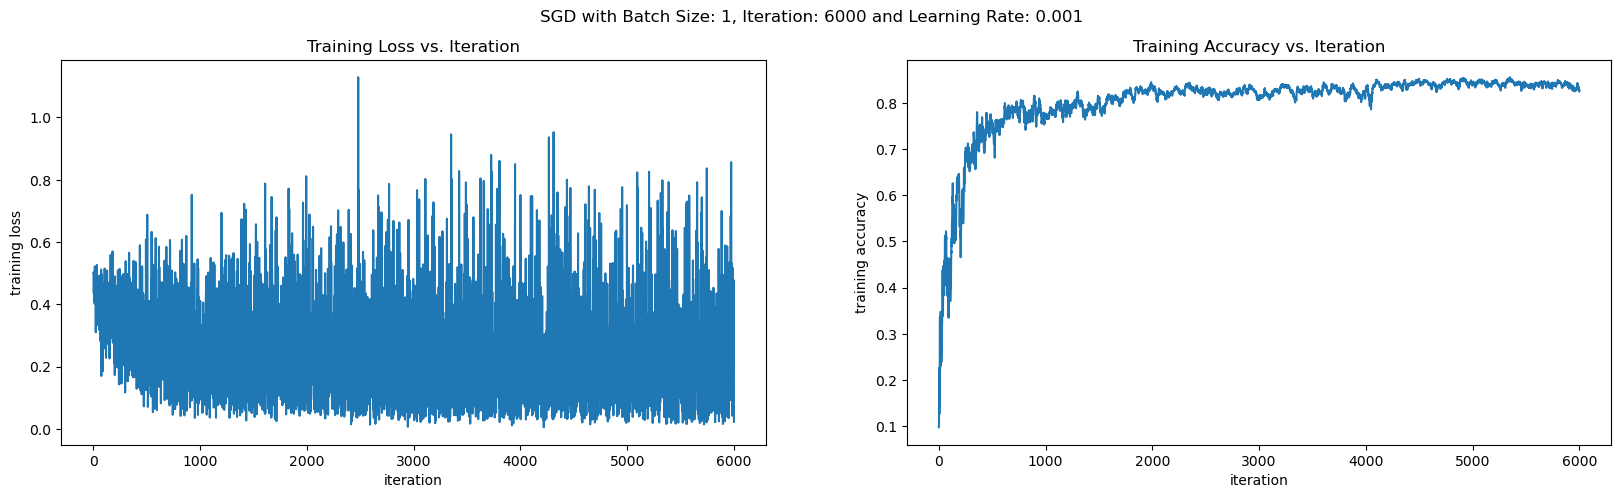

In [20]:
plt.figure(figsize=(20, 5))
plt.subplot(121)
plt.plot(x_axis, running_loss_1)
plt.title('Training Loss vs. Iteration')
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.subplot(122)
plt.plot(x_axis, running_acc_1)
plt.title('Training Accuracy vs. Iteration')
plt.xlabel('iteration')
plt.ylabel('training accuracy')
plt.suptitle('SGD with Batch Size: 1, Iteration: 6000 and Learning Rate: 0.001')
plt.savefig('./sgd_from_scratch_1.jpeg', dpi=300)
plt.show()

In [21]:
######TASK 3 - BATCH: 10######
start_time_10 = time.time()
running_loss_10, running_acc_10, weight_10 = sgd_train(train_data_X, train_data_y, test_data_X, test_data_y, num_of_iterations, 10, 0.001, print_each=1000)
elapsed_time_10 = time.time() - start_time_10
print('####################ELAPSED TIME: {}####################'.format(elapsed_time_10))

iter: 1, loss: 0.5, acc: 0.09799999743700027
iter: 1000, loss: 0.14439155161380768, acc: 0.8184999823570251
iter: 2000, loss: 0.3402755558490753, acc: 0.8356999754905701
iter: 3000, loss: 0.216131329536438, acc: 0.839900016784668
iter: 4000, loss: 0.25145605206489563, acc: 0.8507999777793884
iter: 5000, loss: 0.29638779163360596, acc: 0.8496000170707703
iter: 6000, loss: 0.13489212095737457, acc: 0.8543000221252441
####################ELAPSED TIME: 5.8340113162994385####################


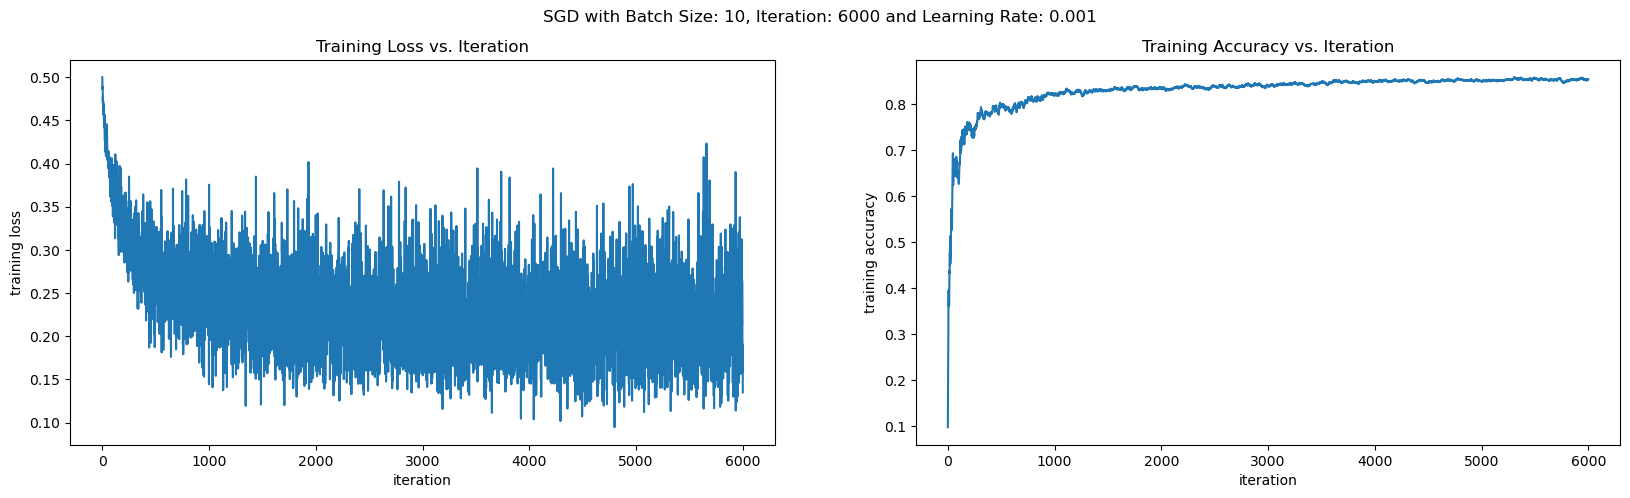

In [22]:
plt.figure(figsize=(20, 5))
plt.subplot(121)
plt.plot(x_axis, running_loss_10)
plt.title('Training Loss vs. Iteration')
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.subplot(122)
plt.plot(x_axis, running_acc_10)
plt.title('Training Accuracy vs. Iteration')
plt.xlabel('iteration')
plt.ylabel('training accuracy')
plt.suptitle('SGD with Batch Size: 10, Iteration: 6000 and Learning Rate: 0.001')
plt.savefig('./sgd_from_scratch_10.jpeg', dpi=300)
plt.show()

In [24]:
######TASK 3 - BATCH: 100######
start_time_100 = time.time()
running_loss_100, running_acc_100, weight_100 = sgd_train(train_data_X, train_data_y, test_data_X, test_data_y, num_of_iterations, 100, 0.001, print_each=1000)
elapsed_time_100 = time.time() - start_time_100
print('####################ELAPSED TIME: {}####################'.format(elapsed_time_100))

iter: 1, loss: 0.5, acc: 0.09799999743700027
iter: 1000, loss: 0.23770974576473236, acc: 0.8220999836921692
iter: 2000, loss: 0.22392547130584717, acc: 0.8356999754905701
iter: 3000, loss: 0.21391965448856354, acc: 0.8434000015258789
iter: 4000, loss: 0.2324782758951187, acc: 0.8495000004768372
iter: 5000, loss: 0.21962958574295044, acc: 0.8514000177383423
iter: 6000, loss: 0.2219686061143875, acc: 0.8529999852180481
####################ELAPSED TIME: 6.037350177764893####################


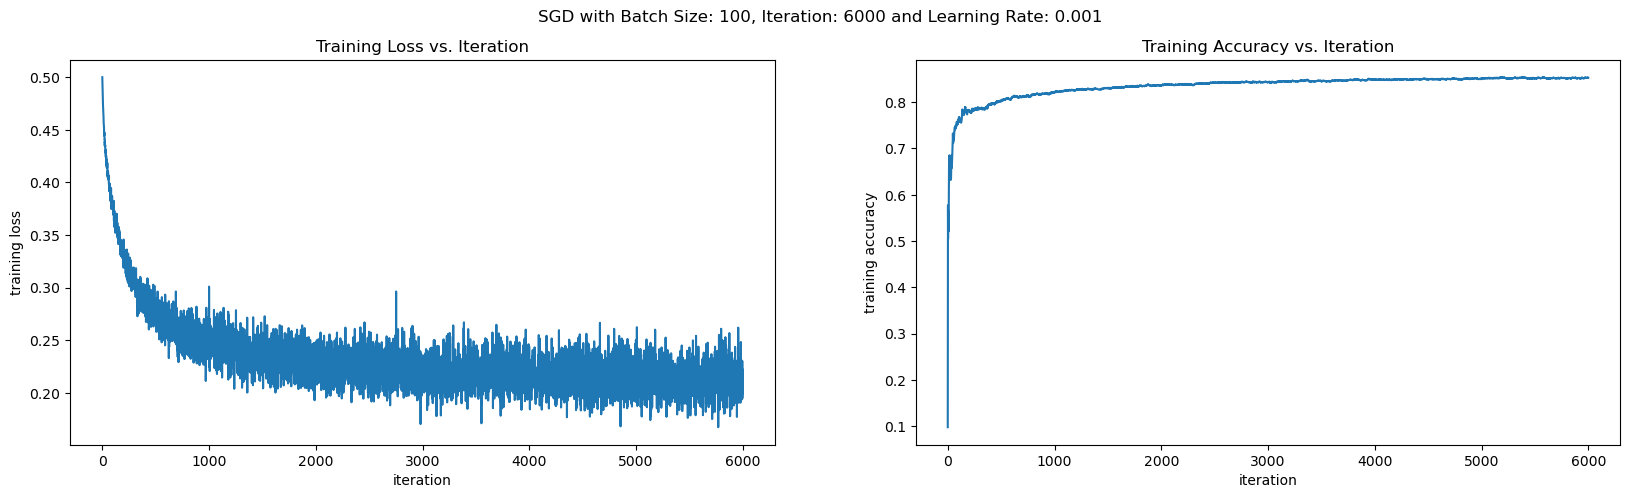

In [25]:
plt.figure(figsize=(20, 5))
plt.subplot(121)
plt.plot(x_axis, running_loss_100)
plt.title('Training Loss vs. Iteration')
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.subplot(122)
plt.plot(x_axis, running_acc_100)
plt.title('Training Accuracy vs. Iteration')
plt.xlabel('iteration')
plt.ylabel('training accuracy')
plt.suptitle('SGD with Batch Size: 100, Iteration: 6000 and Learning Rate: 0.001')
plt.savefig('./sgd_from_scratch_100.jpeg', dpi=300)
plt.show()

In [26]:
######TASK 3 - BATCH: 1000######
start_time_1000 = time.time()
running_loss_1000, running_acc_1000, weight_1000 = sgd_train(train_data_X, train_data_y, test_data_X, test_data_y, num_of_iterations, 1000, 0.001, print_each=1000)
elapsed_time_1000 = time.time() - start_time_1000
print('####################ELAPSED TIME: {}####################'.format(elapsed_time_100))

iter: 1, loss: 0.4999999701976776, acc: 0.09799999743700027
iter: 1000, loss: 0.24414578080177307, acc: 0.8223999738693237
iter: 2000, loss: 0.2263181209564209, acc: 0.836899995803833
iter: 3000, loss: 0.2262534499168396, acc: 0.843999981880188
iter: 4000, loss: 0.21825425326824188, acc: 0.8482000231742859
iter: 5000, loss: 0.21751561760902405, acc: 0.8517000079154968
iter: 6000, loss: 0.20503944158554077, acc: 0.8532000184059143
####################ELAPSED TIME: 6.037350177764893####################


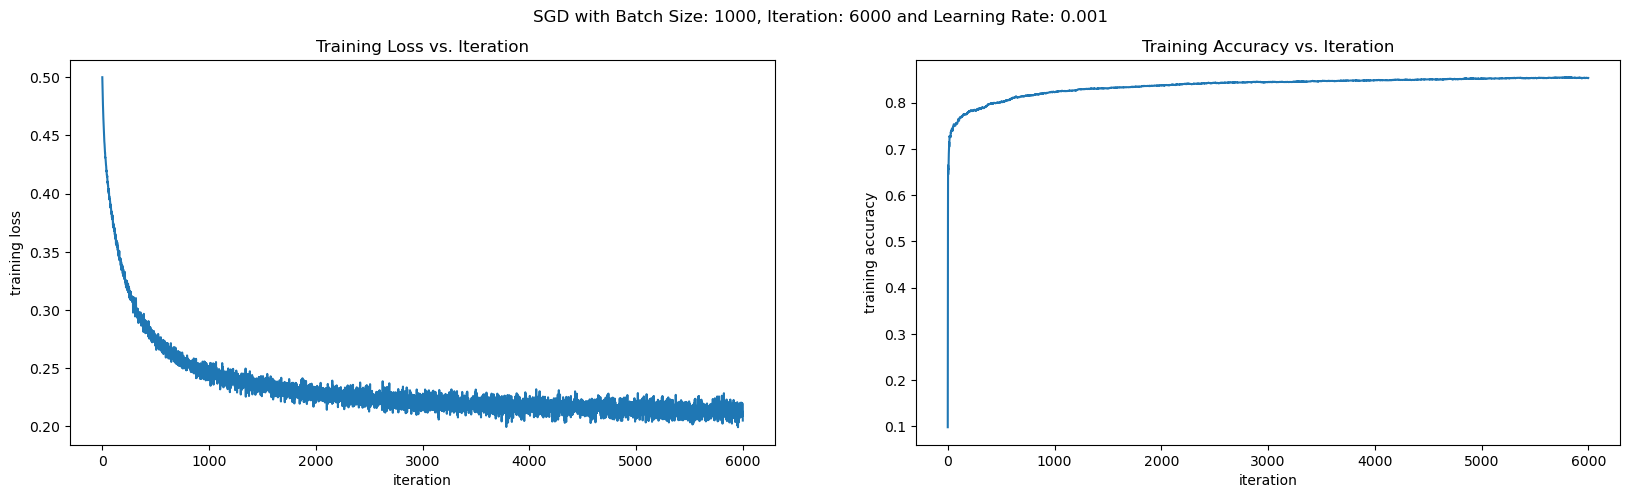

In [27]:
plt.figure(figsize=(20, 5))
plt.subplot(121)
plt.plot(x_axis, running_loss_1000)
plt.title('Training Loss vs. Iteration')
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.subplot(122)
plt.plot(x_axis, running_acc_1000)
plt.title('Training Accuracy vs. Iteration')
plt.xlabel('iteration')
plt.ylabel('training accuracy')
plt.suptitle('SGD with Batch Size: 1000, Iteration: 6000 and Learning Rate: 0.001')
plt.savefig('./sgd_from_scratch_1000.jpeg', dpi=300)
plt.show()

### Task 5

In [28]:
range_arr = list(range(train_data_X.size(0)))

In [29]:
######TASK 5 - NUM SAMPLES: 100######
num_samples = 100
sample_idx = np.random.permutation(range_arr)[:num_samples]
train_data_100_X = train_data_X[sample_idx]
train_data_100_y = train_data_y[sample_idx]
_, running_acc_sample_100, _ = sgd_train(train_data_100_X, train_data_100_y, test_data_X, test_data_y, num_of_iterations, 100, learning_rate)
final_acc_100 = running_acc_sample_100[-1]

iter: 1, loss: 0.5, acc: 0.09799999743700027
iter: 1000, loss: 0.15162311494350433, acc: 0.7067000269889832
iter: 2000, loss: 0.09212540835142136, acc: 0.7139999866485596
iter: 3000, loss: 0.08321640640497208, acc: 0.7114999890327454
iter: 4000, loss: 0.06038432568311691, acc: 0.7056000232696533
iter: 5000, loss: 0.05714955925941467, acc: 0.7028999924659729
iter: 6000, loss: 0.04785087704658508, acc: 0.6978999972343445


In [30]:
######TASK 5 - NUM SAMPLES: 500######
num_samples = 500
sample_idx = np.random.permutation(range_arr)[:num_samples]
train_data_500_X = train_data_X[sample_idx]
train_data_500_y = train_data_y[sample_idx]
_, running_acc_sample_500, _ = sgd_train(train_data_500_X, train_data_500_y, test_data_X, test_data_y, num_of_iterations, 500, learning_rate)
final_acc_500 = running_acc_sample_500[-1]

iter: 1, loss: 0.5, acc: 0.09799999743700027
iter: 1000, loss: 0.22365914285182953, acc: 0.7807000279426575
iter: 2000, loss: 0.19407232105731964, acc: 0.7972000241279602
iter: 3000, loss: 0.18661224842071533, acc: 0.8026999831199646
iter: 4000, loss: 0.17909033596515656, acc: 0.8040000200271606
iter: 5000, loss: 0.16359226405620575, acc: 0.8027999997138977
iter: 6000, loss: 0.15454867482185364, acc: 0.8043000102043152


In [31]:
######TASK 5 - NUM SAMPLES: 1000######
num_samples = 1000
sample_idx = np.random.permutation(range_arr)[:num_samples]
train_data_1000_X = train_data_X[sample_idx]
train_data_1000_y = train_data_y[sample_idx]
_, running_acc_sample_1000, _ = sgd_train(train_data_1000_X, train_data_1000_y, test_data_X, test_data_y, num_of_iterations, 1000, learning_rate)
final_acc_1000 = running_acc_sample_1000[-1]

iter: 1, loss: 0.4999999701976776, acc: 0.09799999743700027
iter: 1000, loss: 0.24081361293792725, acc: 0.8105000257492065
iter: 2000, loss: 0.2068604677915573, acc: 0.8235999941825867
iter: 3000, loss: 0.20379388332366943, acc: 0.8288999795913696
iter: 4000, loss: 0.19775763154029846, acc: 0.8299000263214111
iter: 5000, loss: 0.18886294960975647, acc: 0.8300999999046326
iter: 6000, loss: 0.18545925617218018, acc: 0.8295999765396118


In [32]:
######TASK 5 - NUM SAMPLES: 10000######
num_samples = 10000
sample_idx = np.random.permutation(range_arr)[:num_samples]
train_data_10000_X = train_data_X[sample_idx]
train_data_10000_y = train_data_y[sample_idx]
_, running_acc_sample_10000, _ = sgd_train(train_data_10000_X, train_data_10000_y, test_data_X, test_data_y, num_of_iterations, 10000, learning_rate)
final_acc_10000 = running_acc_sample_10000[-1]

iter: 1, loss: 0.5, acc: 0.09799999743700027
iter: 1000, loss: 0.24541127681732178, acc: 0.8215000033378601
iter: 2000, loss: 0.2292948216199875, acc: 0.8363000154495239
iter: 3000, loss: 0.22234927117824554, acc: 0.8442000150680542
iter: 4000, loss: 0.21903926134109497, acc: 0.8478000164031982
iter: 5000, loss: 0.21363313496112823, acc: 0.8500999808311462
iter: 6000, loss: 0.21383166313171387, acc: 0.8521000146865845


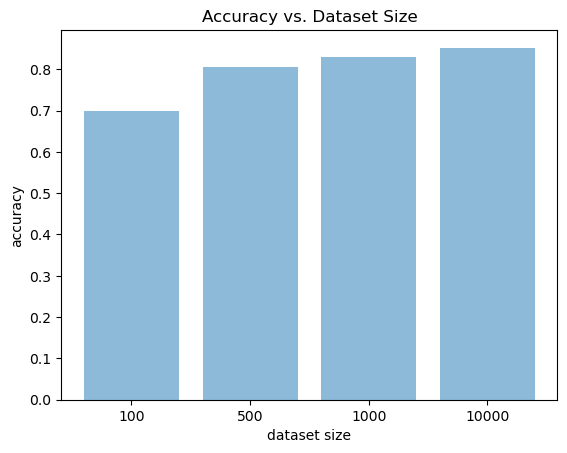

In [37]:
plt.figure()
ticks = ('100', '500', '1000', '10000')
acc_val = [final_acc_100, final_acc_500, final_acc_1000, final_acc_10000]
xticks = list(range(len(ticks)))
plt.bar(xticks, acc_val, align='center', alpha=0.5)
plt.xlabel('dataset size')
plt.xticks(xticks, ticks)
plt.ylabel('accuracy')
plt.title('Accuracy vs. Dataset Size')
plt.savefig('accuracy_data_size.jpeg', dpi=300)
plt.show()

### Task 6 - Bonus

In [41]:
######TASK 6######
class LinearModel(torch.nn.Module):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.linear = torch.nn.Linear(784, 10, bias=False)
        torch.nn.init.zeros_(self.linear.weight)

    def forward(self, x):
        x = x.reshape(100, 784)
        return self.linear(x)

transforms_fnc = transforms.Compose([
    transforms.ToTensor()
])

target_transform_fnc = transforms.Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), 1))

train_data = MNIST('./data', train=True, download=True, transform=transforms_fnc, target_transform=target_transform_fnc)
test_data = MNIST('./data', train=False, download=True, transform=transforms_fnc)

train_loader = DataLoader(train_data, batch_size=100, shuffle=True)
test_loader = DataLoader(test_data, batch_size=100, shuffle=False)

model = LinearModel().to('cuda')
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=learning_rate)

running_loss = []
running_acc = []
for epoch in range(10):
    for data, label in train_loader:
        data, label = data.to('cuda'), label.to('cuda')
        optimizer.zero_grad()

        preds = model(data)

        loss = criterion(preds, label)
        running_loss.append(loss)
        loss.backward()
        optimizer.step()

        with torch.no_grad():
            curr_acc = 0
            for test_data, test_label in test_loader:
                test_data, test_label = test_data.to('cuda'), test_label.to('cuda')
                test_pred = model(test_data)
                test_pred_idx = torch.argmax(test_pred, dim=1)
                curr_acc += torch.sum((test_label == test_pred_idx).int())
            curr_acc = curr_acc / len(test_data)
            running_acc.append(curr_acc)
    print('epoch: {}, loss: {}, acc: {}'.format(epoch + 1, running_loss[-1], running_acc[-1]))

epoch: 1, loss: 0.07244554162025452, acc: 76.8699951171875
epoch: 2, loss: 0.06307823210954666, acc: 77.97000122070312
epoch: 3, loss: 0.06043504551053047, acc: 79.31999969482422
epoch: 4, loss: 0.054200440645217896, acc: 80.25999450683594
epoch: 5, loss: 0.048468247056007385, acc: 80.72999572753906
epoch: 6, loss: 0.052089184522628784, acc: 81.4000015258789
epoch: 7, loss: 0.04437008127570152, acc: 81.72999572753906
epoch: 8, loss: 0.04932583123445511, acc: 82.1500015258789
epoch: 9, loss: 0.047069650143384933, acc: 82.47999572753906
epoch: 10, loss: 0.048566434532403946, acc: 82.68000030517578


In [43]:
running_loss_torch = [x.item() for x in running_loss]
running_acc_torch = [x.item() for x in running_acc]

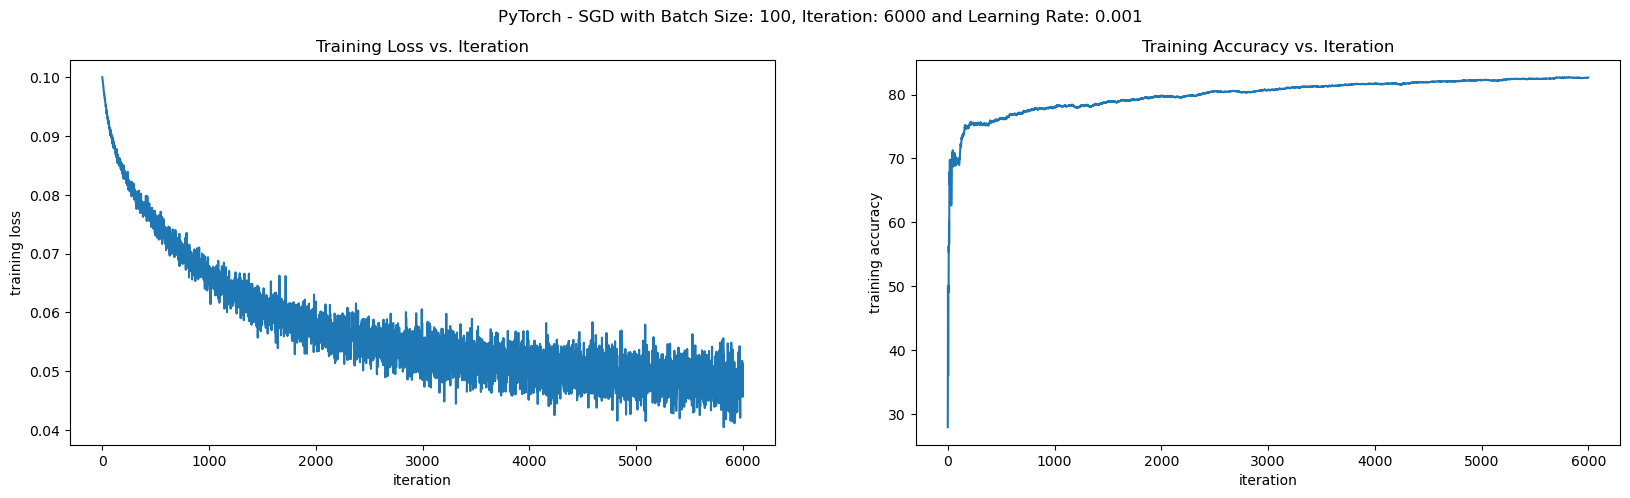

In [45]:
plt.figure(figsize=(20, 5))
plt.subplot(121)
plt.plot(x_axis, running_loss_torch)
plt.title('Training Loss vs. Iteration')
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.subplot(122)
plt.plot(x_axis, running_acc_torch)
plt.title('Training Accuracy vs. Iteration')
plt.xlabel('iteration')
plt.ylabel('training accuracy')
plt.suptitle('PyTorch - SGD with Batch Size: 100, Iteration: 6000 and Learning Rate: 0.001')
plt.savefig('./pytorch_training.jpeg', dpi=300)
plt.show()